## Ví dụ sử dụng `stata_kernel` Jupyter notebook

Jupyter notebook này là ví dụ về cách hoạt động của `stata_kernel` với Jupyter.

Toàn bộ hướng dẫn cùng với cách cài đặt tham khảo tại đây https://kylebarron.dev/stata_kernel/.

## Tổng quan

Jupyter là một ngôn ngữ có thể dùng đa dạng. Bài viết này sử dụng câu lệnh cho Stata, ngoài ra nó còn có thể sử dụng để chạy các ngôn ngữ khác tương tự như Python, [R](https://irkernel.github.io/), [Julia](https://github.com/JuliaLang/IJulia.jl), [Matlab](https://github.com/calysto/matlab_kernel), and [SAS](https://github.com/sassoftware/sas_kernel). 

## Thực hiện câu lệnh

Đảm bảo rằng Jupyter đã được kết nối với Stata bằng việc chạy câu lệnh dưới đây

In [1]:
display "Hello, world!"

Hello, world!


Bạn có thể chạy 1 ô câu lệnh bằng việc nhấn tổ hợp phím <kbd>Ctrl</kbd>+<kbd>Enter</kbd> hoặc <kbd>Shift</kbd>+<kbd>Enter</kbd>. Nếu dòng text trong dấu ngoặc "" được hiện ra bên dưới ô lệnh có nghĩa là Jupyter đã được kết nối thành công với Stata. (Đôi khi khi thực hiện ô lệnh sẽ không xuất hiện kết quả nào bên dưới).

Nếu bạn không nhìn thấy kết quả `Hello, world!`, đọc thêm tại [troubleshooting tips](https://kylebarron.dev/stata_kernel/using_stata_kernel/troubleshooting/).

Hãy thử load bộ số liệu `auto`.

In [2]:
sysuse auto.dta

(1978 Automobile Data)


### Một số thống kê mô tả

Gần như toàn bộ câu lệnh của Stata chạy được trên Jupyter tuy nhiên có một ố câu lệnh phụ thuộc vào GUI (Graphical User Interface), ví dụ lệnh `browse` và `edit`, chỉ hoạt động trên Windows.

In [3]:
tabulate foreign headroom, m


           |                     Headroom (in.)
  Car type |       1.5        2.0        2.5        3.0        3.5 |     Total
-----------+-------------------------------------------------------+----------
  Domestic |         3         10          4          7         13 |        52 
   Foreign |         1          3         10          6          2 |        22 
-----------+-------------------------------------------------------+----------
     Total |         4         13         14         13         15 |        74 


           |          Headroom (in.)
  Car type |       4.0        4.5        5.0 |     Total
-----------+---------------------------------+----------
  Domestic |        10          4          1 |        52 
   Foreign |         0          0          0 |        22 
-----------+---------------------------------+----------
     Total |        10          4          1 |        74 


## Biểu đồ

Biểu đồ sẽ xuất hiện theo thứu tự trong câu lệnh.


(highschool and beyond (200 cases))


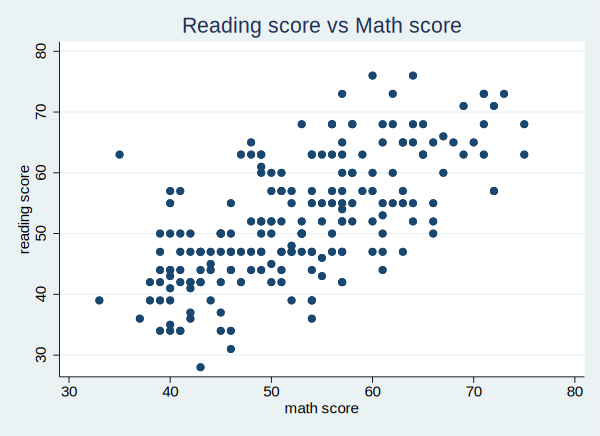

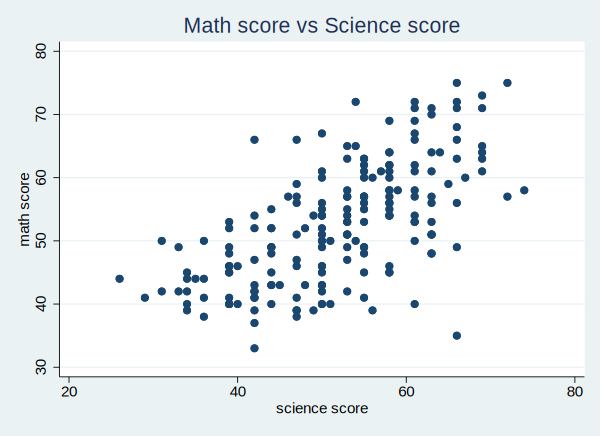

In [4]:
// Dataset with test scores
use "https://stats.idre.ucla.edu/stat/stata/notes/hsb2", clear
scatter read math, title("Reading score vs Math score")
scatter math science, title("Math score vs Science score")

Nếu bạn không muốn hiển thị biểu đồ trong phần kết quả thêm tiền tố `quietly` hoặc có thể viết tắt `qui`

In [5]:
quietly scatter read math, title("Reading score vs Math score")

## Bình luận trong câu lệnh

`stata_kernel` cho phép bạn sử dụng bất kỳ định dạng nào của bình luânlets you use _any_ format of comments, including `//`, `///`, `*`, and `/*`-`*/`, even in an interactive console environment where the Stata command line normally wouldn't accept them.

In [6]:
display "displayed"
// display "comment"
display "line continuation " /// comment
    "comment"
* display "not displayed"
display "displayed1"
/*
display "displayed2"
*/
display "displayed3"


displayed

line continuation comment

displayed1

displayed3


## Tự động/gợi ý hoàn thành câu lệnh

`stata_kernel` cung cấp tự động hoàn thành/gợi ý cho locals, globals, variables, scalars, và matrices dựa trên nội dung trong bộ nhớ. Nó cũng gợi ý đường dẫn file để load hoặc lưu file. Nhấn <kbd>Tab</kbd> trong khi gõ lệnh để kích hoạt chức năng này.

![](https://raw.githubusercontent.com/kylebarron/stata_kernel/master/docs/src/img/jupyterlab_autocompletion.png)

## Magics

[_Magics_](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) là câu lệnh đặc biệt mà `stata_kernel` cung cấp để thêm các chức năng, đặc biệt về việc kết nối với Jupyter. 

Những câu lệnh này sẽ bắt đầu bằng `%`. Bạn có thể chạy `%help magics` hoặc [đi tới đây](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) để xem các magics có sẵn. Bạn cũng có thể chạy câu lệnh `%magic_name --help` để xem hướng dẫn cho bất kỳ câu lệnh magic nào.

Để tránh nhầm lẫn, những câu lệnh này **bắt buộc** ở đầu của 1 ô.

### `%head`, `%browse`, `%tail`

**`%head`**, **`%browse`**, và **`%tail`** có đầu ra là một phần được format đẹp của dữ liệu trong bộ nhớ.

In [7]:
%head 5

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,male,white,low,public,general,57,52,41,47,57
2,121,female,white,middle,public,vocation,68,59,53,63,61
3,86,male,white,high,public,general,44,33,54,58,31
4,141,male,white,high,public,vocation,63,44,47,53,56
5,172,male,white,middle,public,academic,47,52,57,53,61


### `%help`
**`%help`** có đầu ra là help menu cho câu lệnh phía sau. Liên kết trong help file có thể click được, giống như văn bản chính thức của Stata. (câu lệnh này yêu cầu kết nối mạng)

In [8]:
%help summarize

This front-end cannot display HTML help.

### `%locals`, `%globals`

**`%locals`** and **`%globals`** cho đầu ra là local hoặc global macros trong môi trường hiện tại.

In [9]:
local local1 "foo"
local local2 "bar"
local abcd "foo bar"

In [10]:
%locals

abcd:   foo bar
local2: bar
local1: foo


In [11]:
%locals loc

local2: bar
local1: foo


In [12]:
%globals

(note: showing first line of global values; run with --verbose)

T_gm_fix_span:              0
stata_kernel_graph_counter: 2
S_FNDATE:                   17 Jun 2002 08:48
S_FN:                       https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
S_ADO:                      BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"C:\Users\DELL\AppData\Local
S_level:                    95
F1:                         help advice;
F2:                         describe;
F7:                         save
F8:                         use
S_StataSE:                  SE
S_FLAVOR:                   Intercooled
S_OS:                       Windows
S_OSDTL:                    64-bit
S_MACH:                     PC (64-bit x86-64)


## Sử dụng Mata

Bạn có thể bắt đầu tương tác với phiên Mata bằng việc nhập `mata`. Nó sẽ thống nhất xuyên suốt các ô lệnh, các ô lệnh sẽ tiếp tục là ô lệnh Mata cho đến khi bạn chạy `end` để kết thúc phiên mata.

Bạn có thể chạy **`%status`** magic để kiếm tra có phải bạn đang trong phiên mata hay trong phần Stata.

In [13]:
sysuse auto, clear

(1978 Automobile Data)


In [14]:
mata

------------------------------------------------- mata (type end to exit) ------


In [15]:
%status

stata_kernel 1.11.2 for Stata 15.1


	Delimiter:   cr
	Environment: Mata


In [16]:
y    = st_data(., "price")
X    = st_data(., "mpg trunk")
n    = rows(X)
X    = X,J(n,1,1)
XpX  = quadcross(X, X)
XpXi = invsym(XpX)
b    = XpXi*quadcross(X, y)

In [17]:
b'

                  1              2              3
    +----------------------------------------------+
  1 |  -220.1648801    43.55851009    10254.94983  |
    +----------------------------------------------+


In [18]:
end


--------------------------------------------------------------------------------


In [19]:
%status

stata_kernel 1.11.2 for Stata 15.1


	Delimiter:   cr
	Environment: Stata
